<h1 style="color:red;font-size:46px;text-align:center;">Google Maps<h1/>

<h1 align=center><font size = 6, color = blue>Exploratory Data Analysis-2</font></h1>

In [48]:
import pandas as pd
import numpy as np

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [50]:
df = pd.read_csv("klinik_bewertungen_google_afterAnalysis.csv")
df.head()

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1
2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1
3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1
4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0


In [51]:
import textblob
from textblob_de import TextBlobDE

In [52]:
print("polarity: ",TextBlobDE('Sehr nett,  und kompetenter Arzt. Beste KH weit und breit.').sentiment[0])

polarity:  0.5


In [53]:
df[["Name der Klinik","Textuelle Bewertung"]].describe(include=['object'])

,Name der Klinik,Textuelle Bewertung
count,1487,1487
unique,17,1485
top,Klinikum Wolfsburg in Wolfsburg,Viel zu lange Wartezeit und unfreundlicher Umg...
freq,164,2


<h2 id="basic_grouping">Grouping by Klinik</h2>

In [54]:
df_kliniks_mean=df.groupby(['Name der Klinik'],as_index=False).mean()
df_kliniks_mean=df_kliniks_mean[['Name der Klinik','Polaritiy','Sternebewertung','positive']]
df_kliniks_mean

,Name der Klinik,Polaritiy,Sternebewertung,positive
0,AMEOS Klinikum Hildesheim,0.147623,2.523077,0.353846
1,AMEOS Klinikum Seepark Geestland,0.238746,3.212766,0.446809
2,DIAKOVERE Henriettenstift,0.251831,2.948454,0.463918
3,Eilenriede Klinik Hannover,0.561382,4.766667,0.800000
4,HELIOS Klinik Cuxhaven,0.207483,2.892562,0.396694
5,Helios Kliniken Mittelweser,0.052030,2.364865,0.256757
6,Herzogin Elisabeth Hospital,0.444555,4.232143,0.678571
7,KRH Klinikum Agnes Karll Laatzen,0.154217,2.879630,0.314815
8,Klinik Am Zuckerberg GmbH,0.431488,3.918919,0.621622
9,Klinikum Peine gGmbH,0.183019,2.961538,0.384615


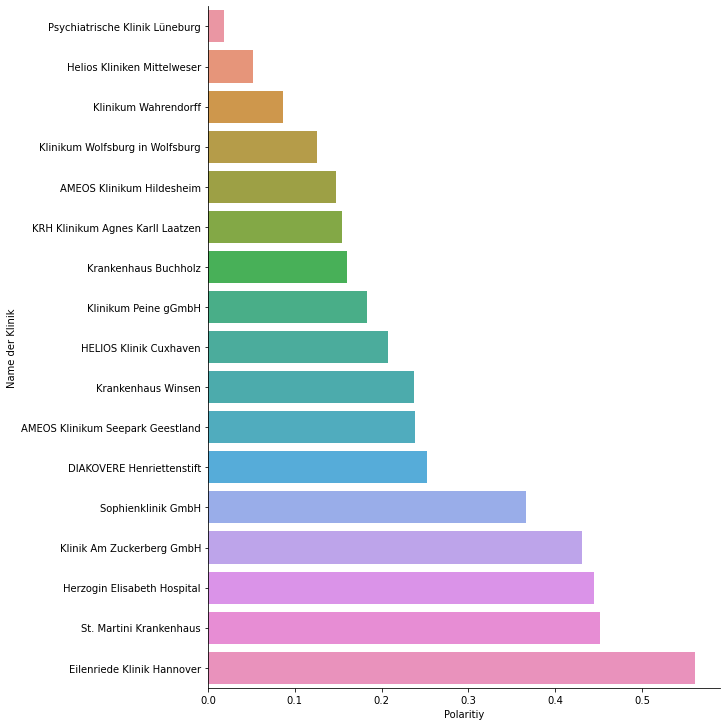

In [55]:
df_kliniks_mean=df_kliniks_mean.sort_values('Polaritiy')
sns.catplot(x="Polaritiy",y="Name der Klinik",data=df_kliniks_mean,kind="bar",height=10)

In [56]:
df_kliniks_mean[["Polaritiy","Sternebewertung"]].corr()

,Polaritiy,Sternebewertung
Polaritiy,1.000000,0.975872
Sternebewertung,0.975872,1.000000


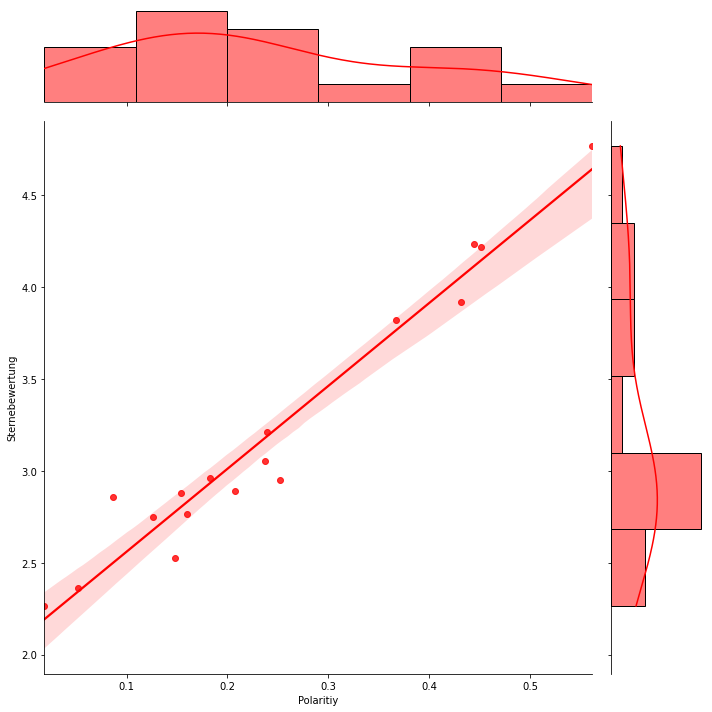

In [57]:
sns.jointplot(x=df_kliniks_mean["Polaritiy"],y=df_kliniks_mean["Sternebewertung"],data=df_kliniks_mean,kind="reg",color="r",height=10)

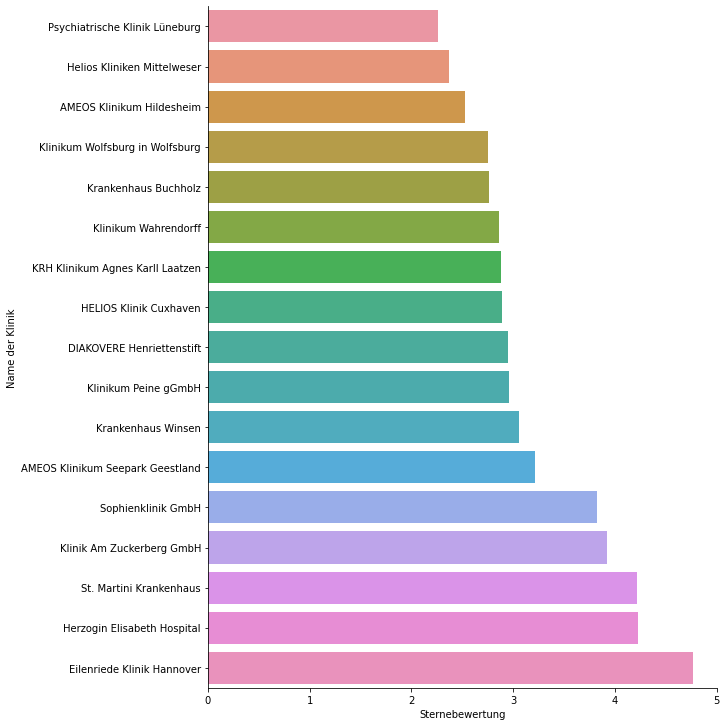

In [11]:
df_kliniks_mean=df_kliniks_mean.sort_values('Sternebewertung')
sns.catplot(x="Sternebewertung",y="Name der Klinik",data=df_kliniks_mean,kind="bar",height=10)

<h2 id="basic_grouping">Grouping by Year</h2>

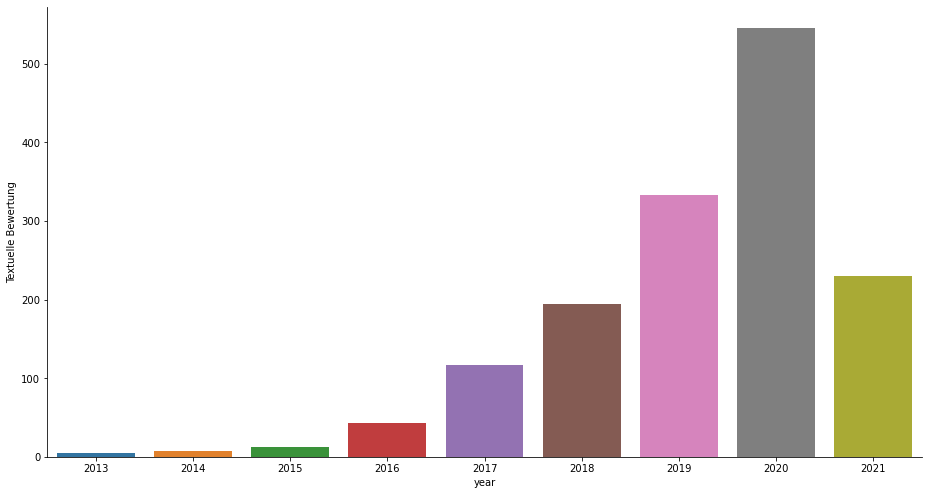

In [12]:
df_year_count=df.groupby(['year'],as_index=False).count()
df_year_count=df_year_count[['year','Textuelle Bewertung']]
df_year_count
g=sns.catplot(x="year",y="Textuelle Bewertung",data=df_year_count,kind="bar")
g.fig.set_size_inches(14,7)

In [46]:
df.groupby(['year'],as_index=False).mean()

,year,Sternebewertung,Polaritiy,Subjectivity,Likes,positive
0,2013,4.000000,0.322857,0.000000,0.600000,0.400000
1,2014,2.750000,0.303916,0.013978,1.875000,0.500000
2,2015,3.500000,0.439881,0.000000,0.333333,0.750000
3,2016,2.604651,0.155592,0.035548,1.255814,0.255814
4,2017,3.042735,0.239100,0.080463,1.846154,0.444444
5,2018,3.206186,0.256654,0.058148,2.618557,0.432990
6,2019,3.006006,0.193000,0.059057,3.309309,0.423423
7,2020,3.053211,0.199001,0.055148,4.423853,0.431193
8,2021,3.169565,0.253378,0.062842,2.952174,0.460870


<h2 id="basic_grouping">Klinik by Klinik</h2>

In [13]:
df["Name der Klinik"].unique()

array(['Herzogin Elisabeth Hospital', 'Klinik Am Zuckerberg GmbH',
       'Klinikum Wolfsburg in Wolfsburg', 'Klinikum Peine gGmbH',
       'St. Martini Krankenhaus', 'DIAKOVERE Henriettenstift',
       'Eilenriede Klinik Hannover', 'Sophienklinik GmbH',
       'KRH Klinikum Agnes Karll Laatzen', 'Klinikum Wahrendorff',
       'AMEOS Klinikum Hildesheim', 'Helios Kliniken Mittelweser',
       'HELIOS Klinik Cuxhaven', 'AMEOS Klinikum Seepark Geestland',
       'Krankenhaus Buchholz', 'Krankenhaus Winsen',
       'Psychiatrische Klinik Lüneburg'], dtype=object)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


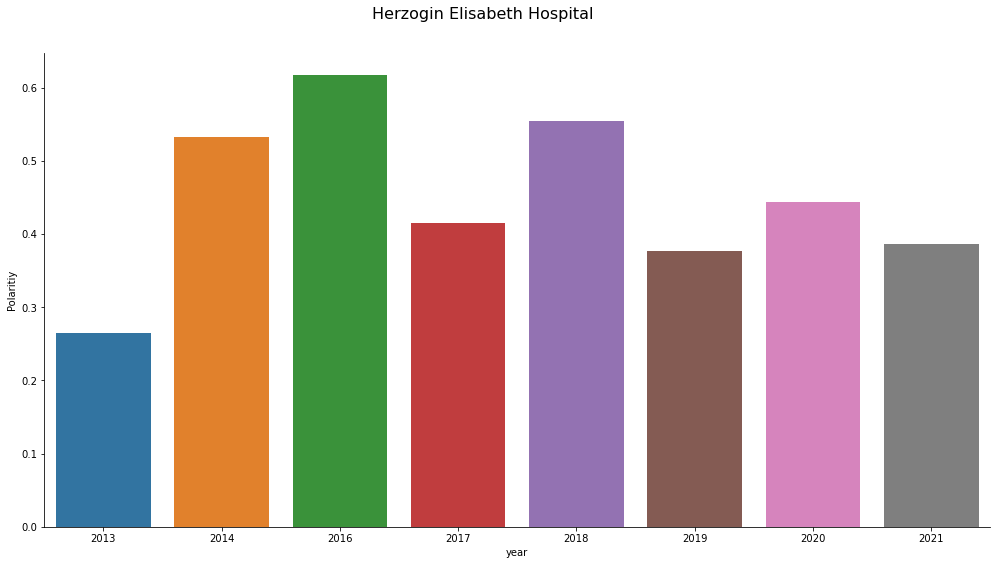

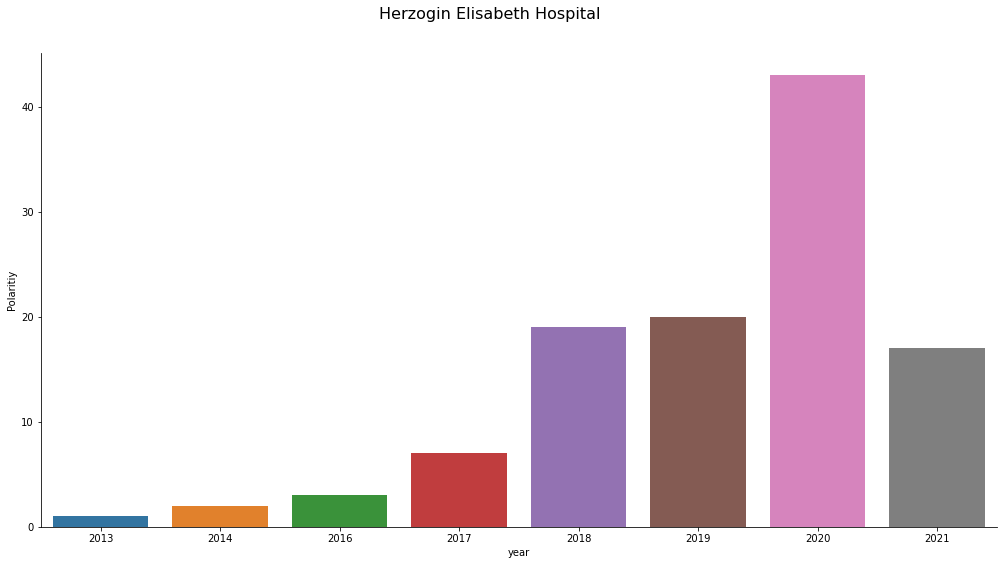

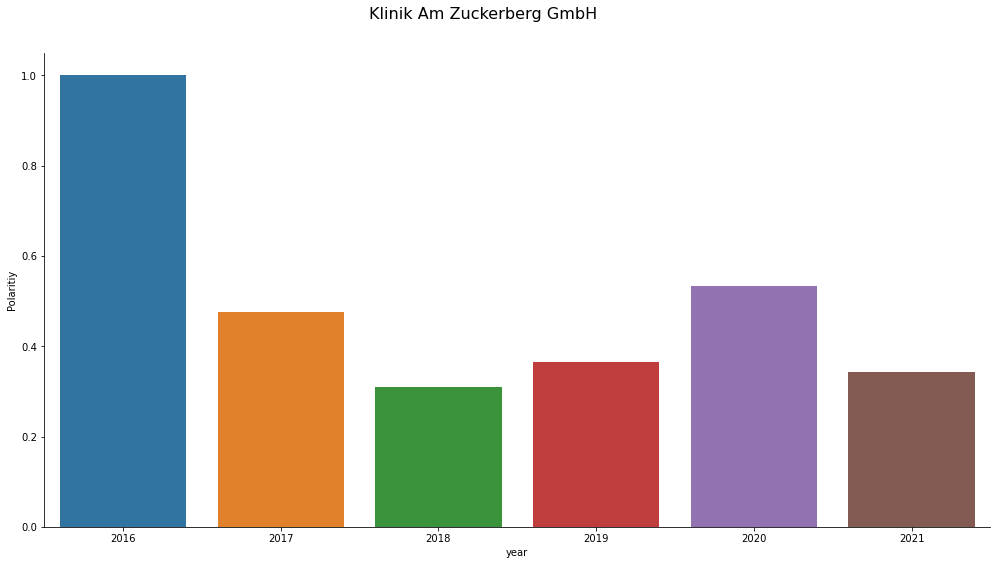

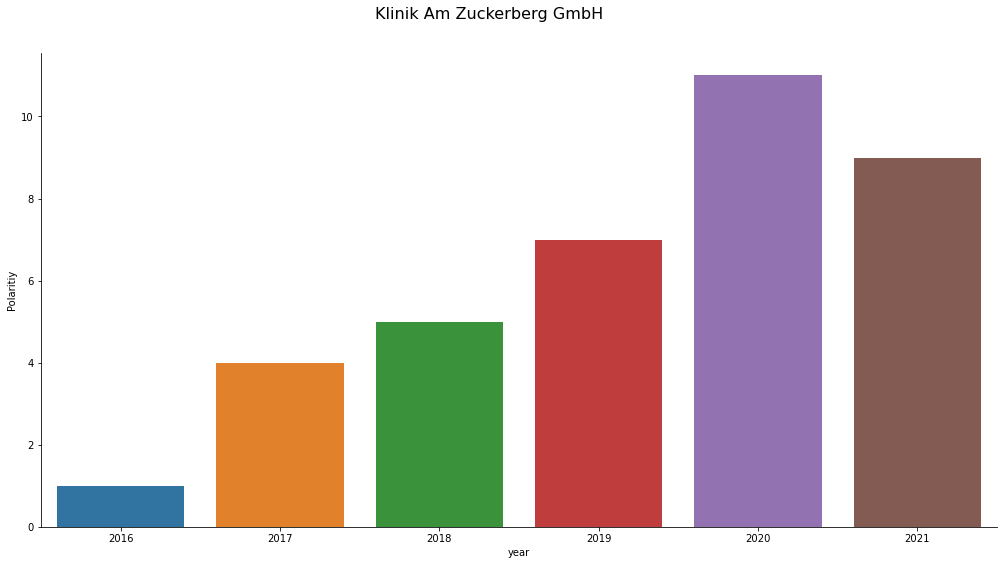

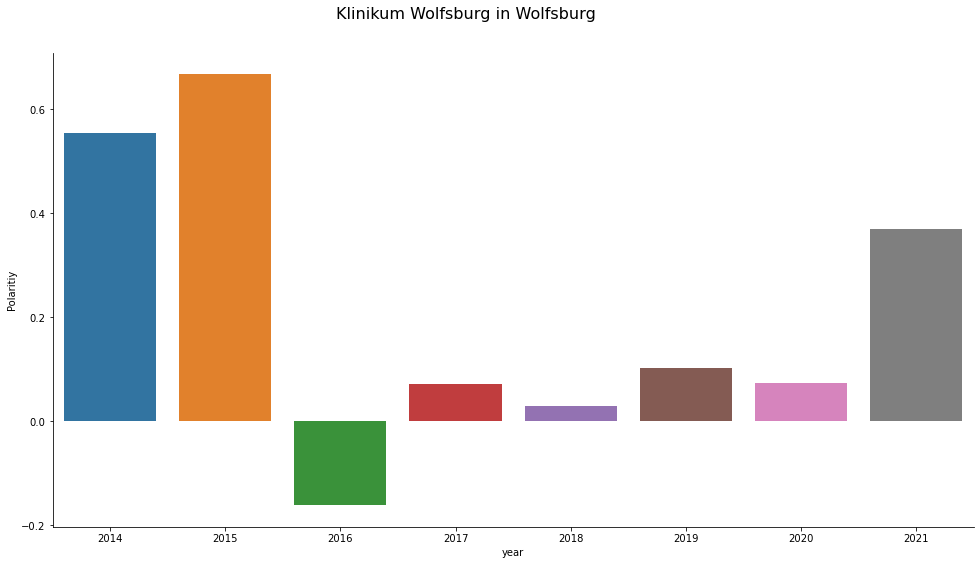

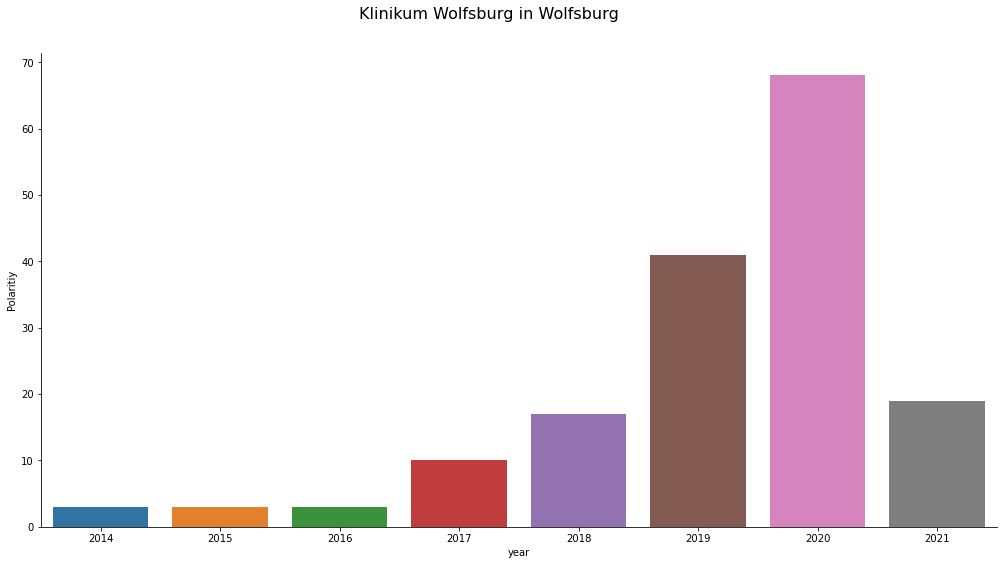

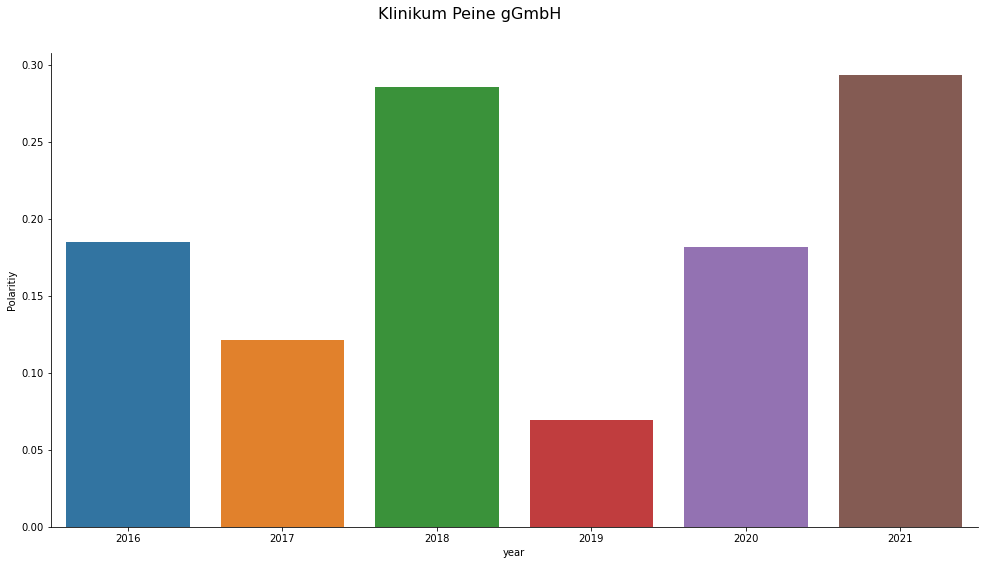

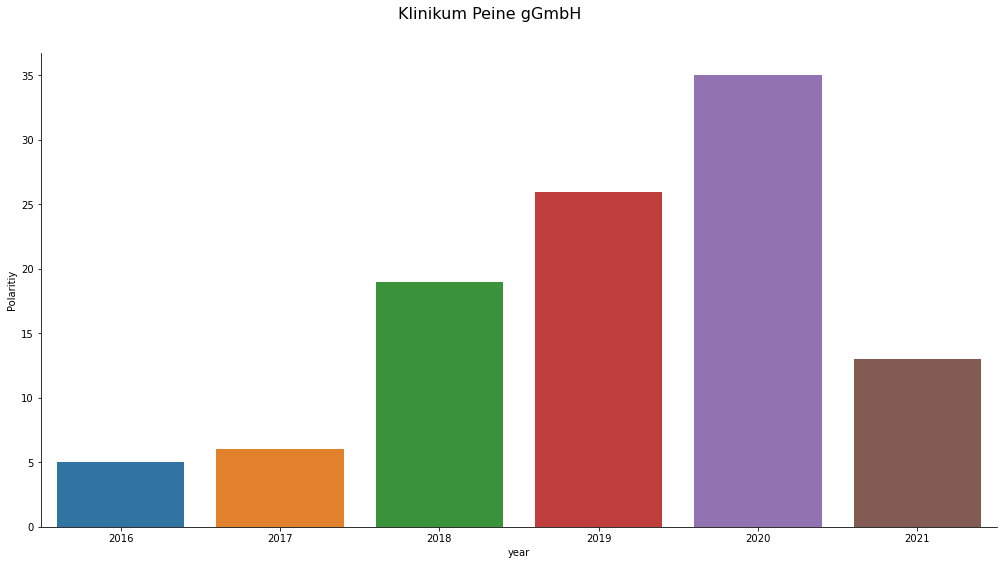

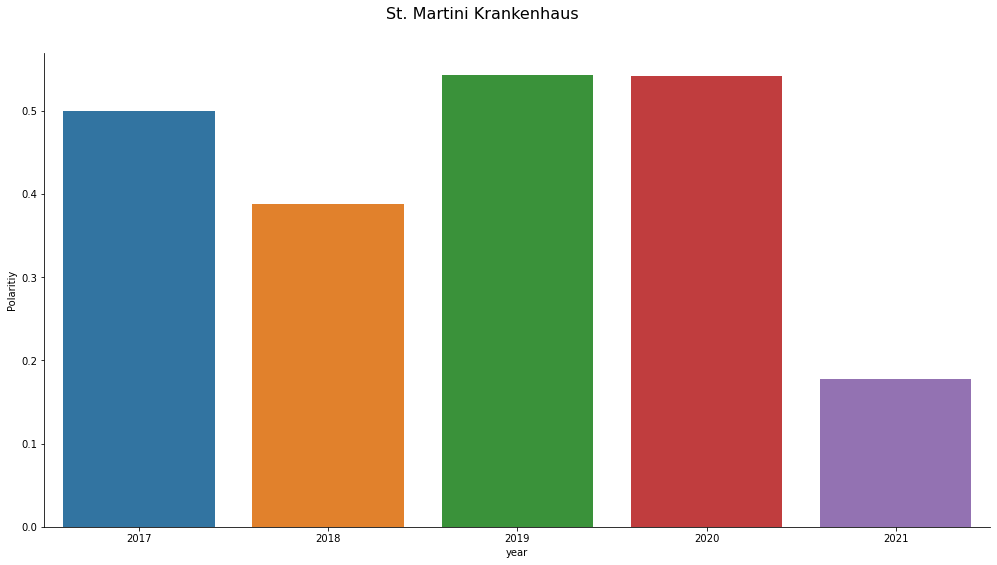

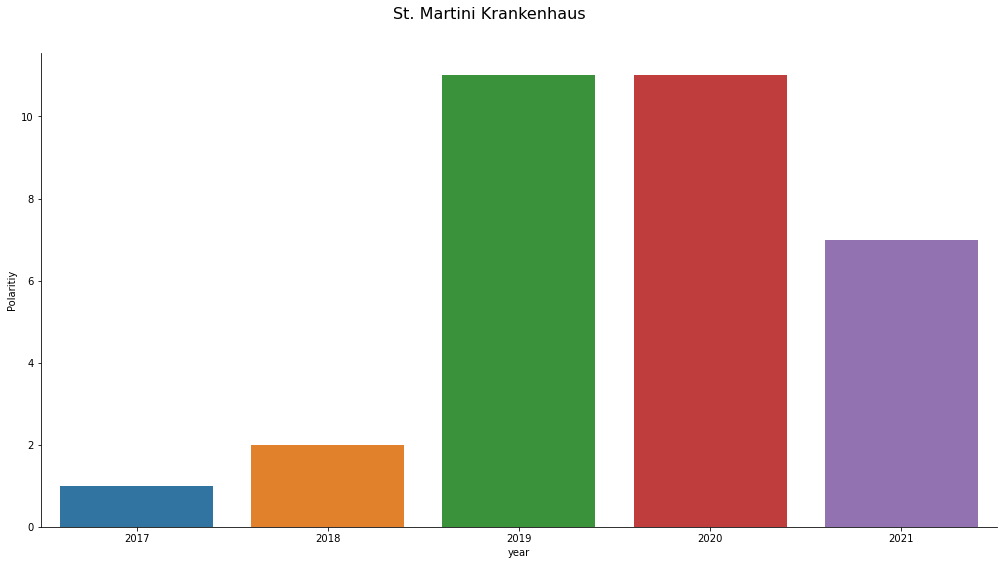

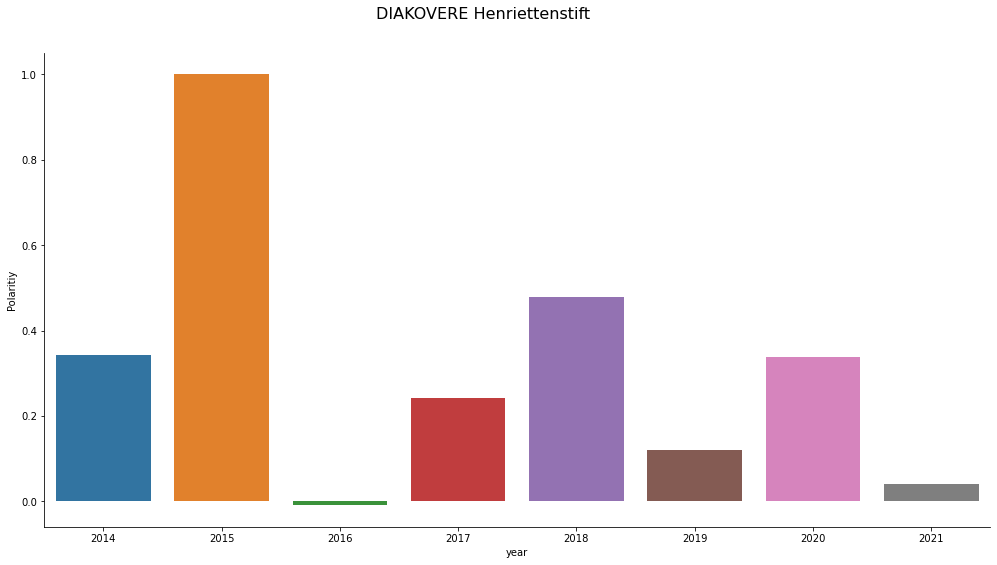

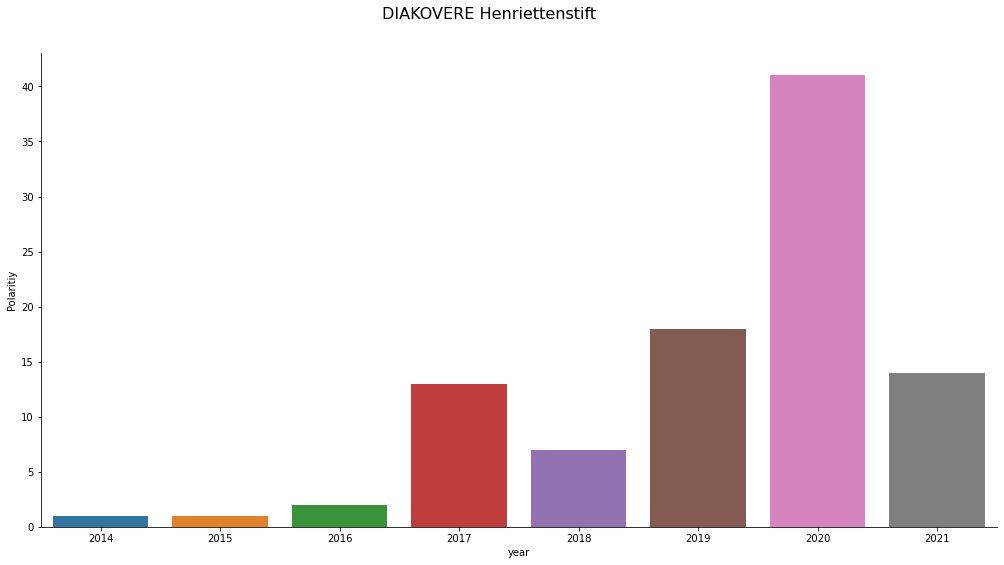

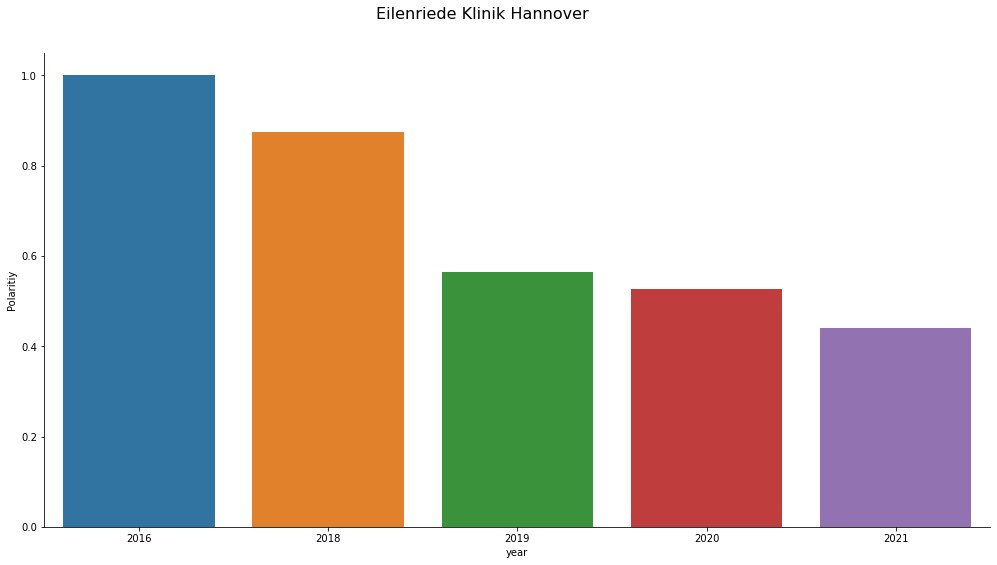

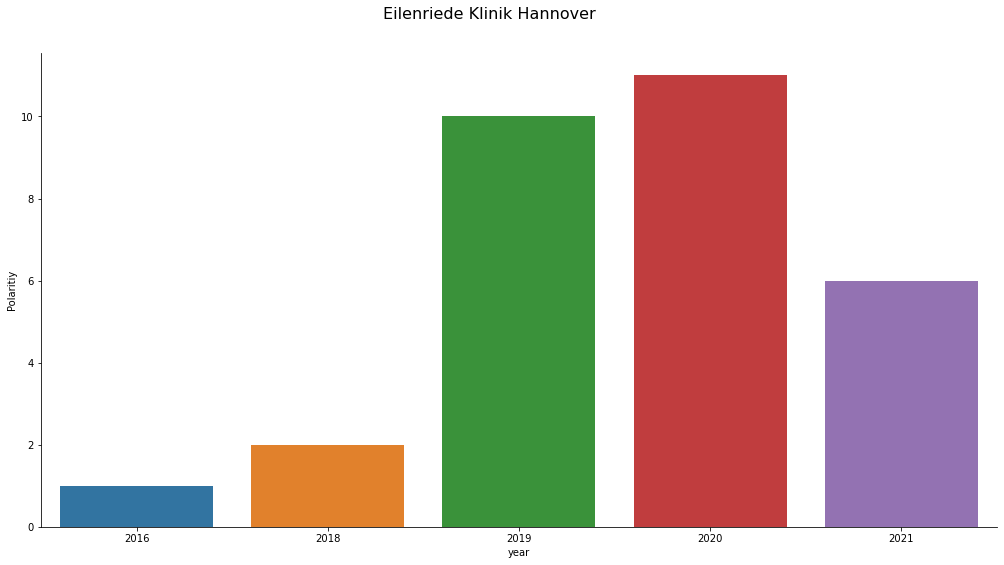

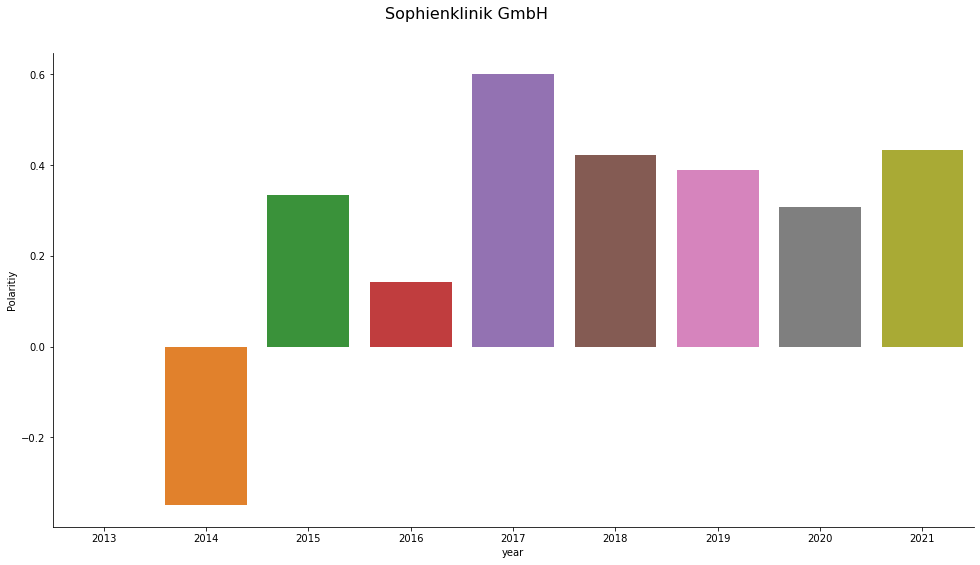

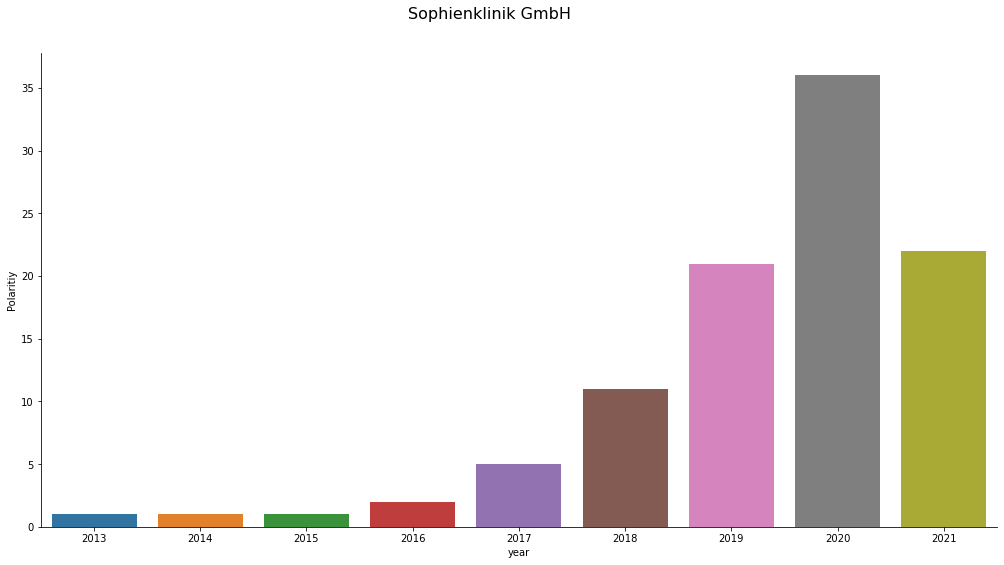

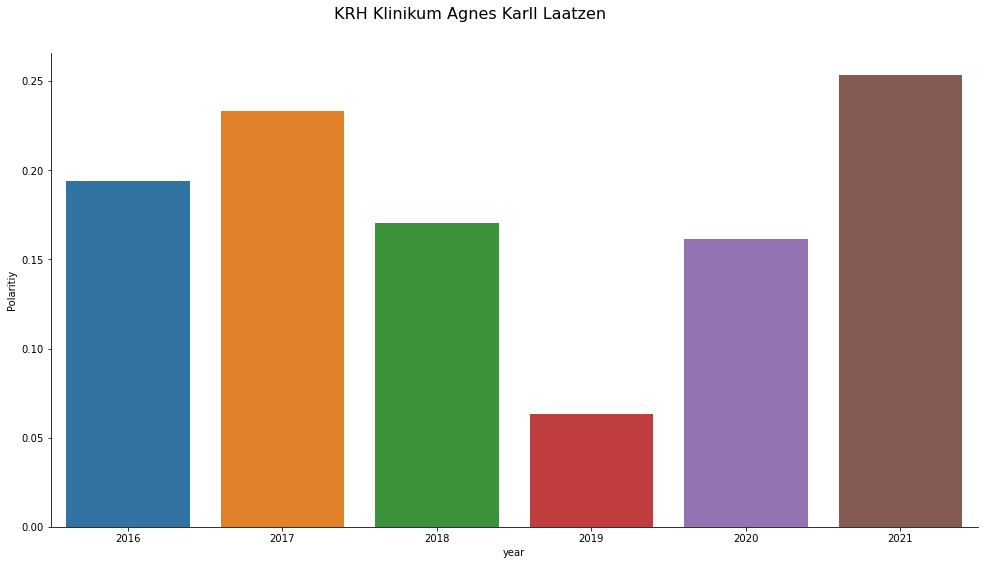

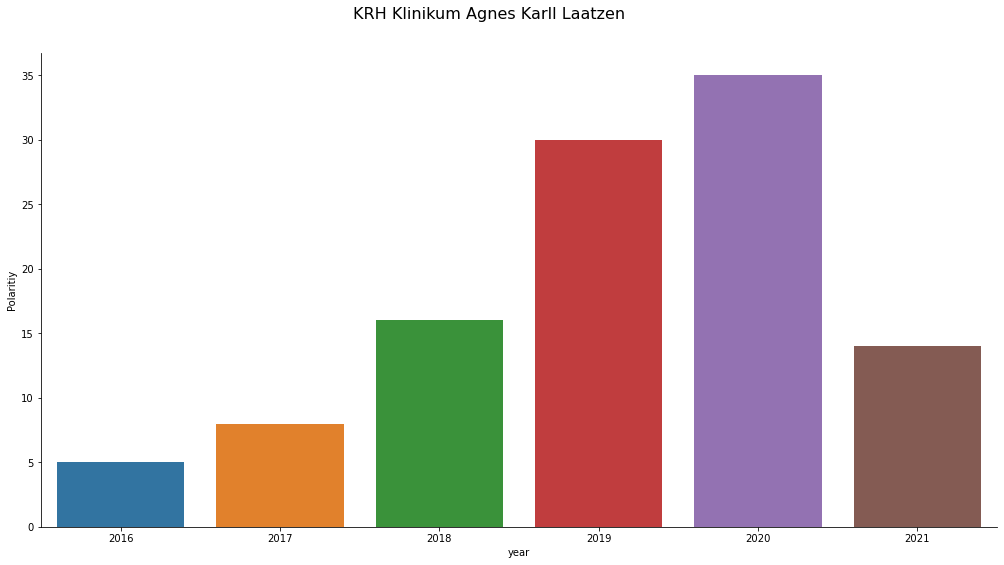

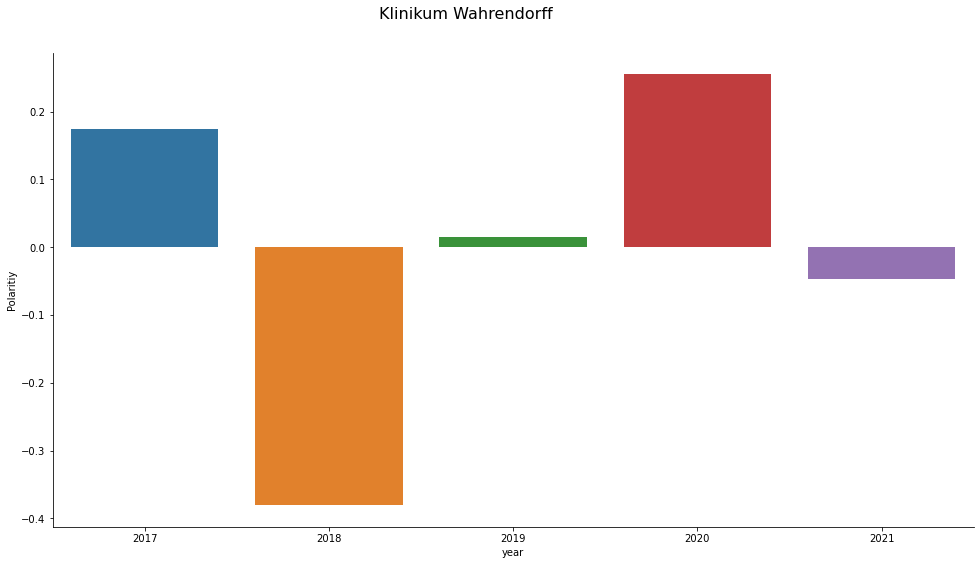

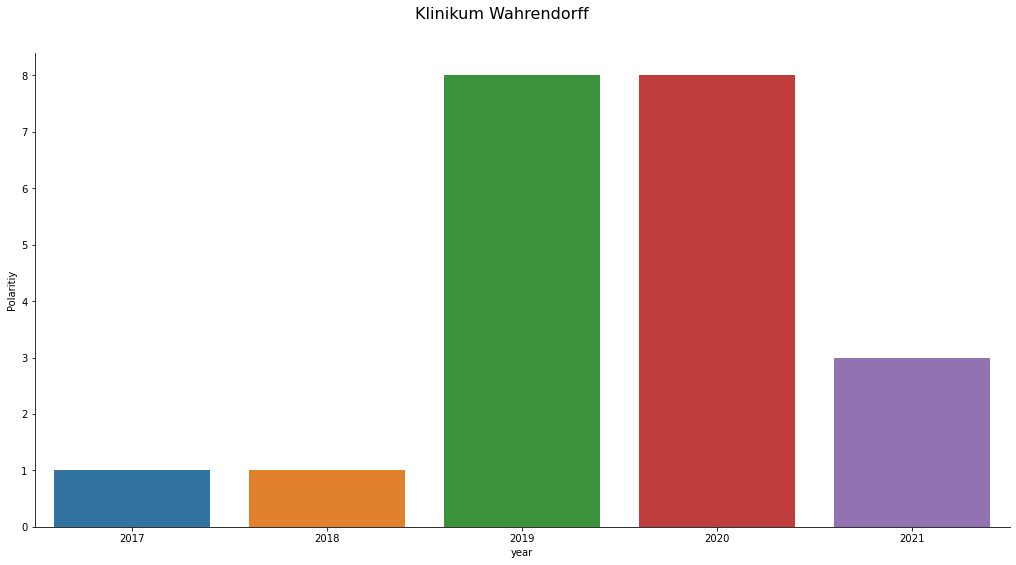

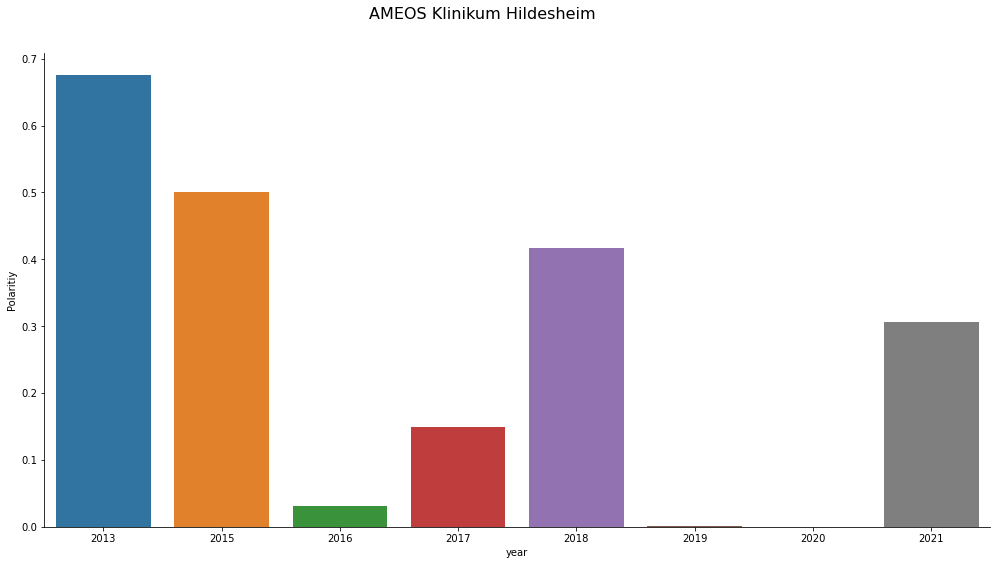

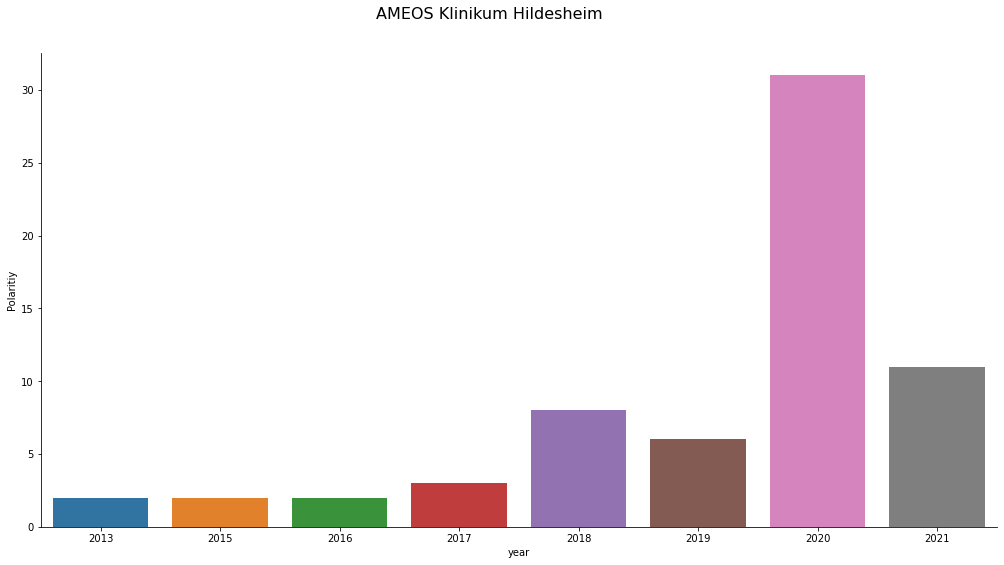

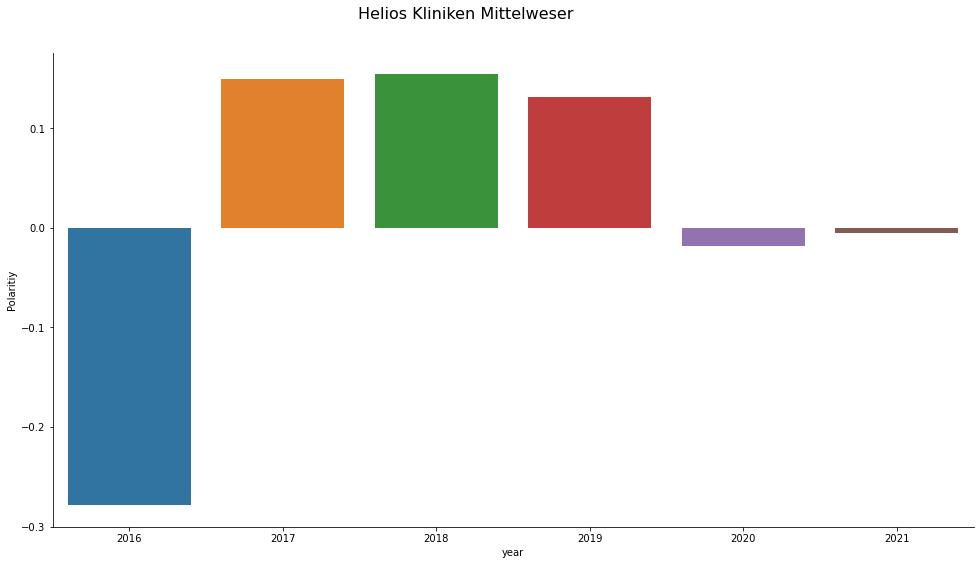

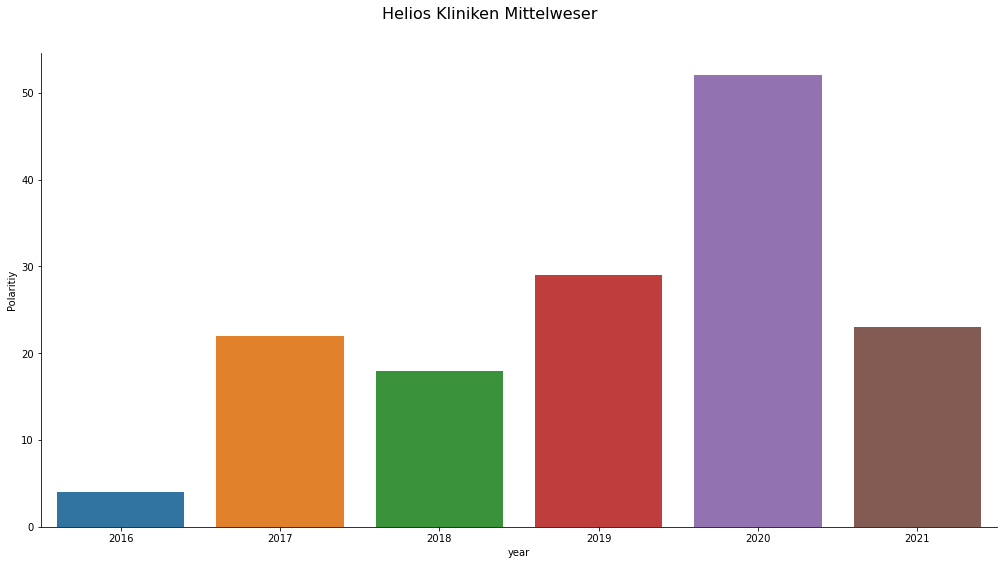

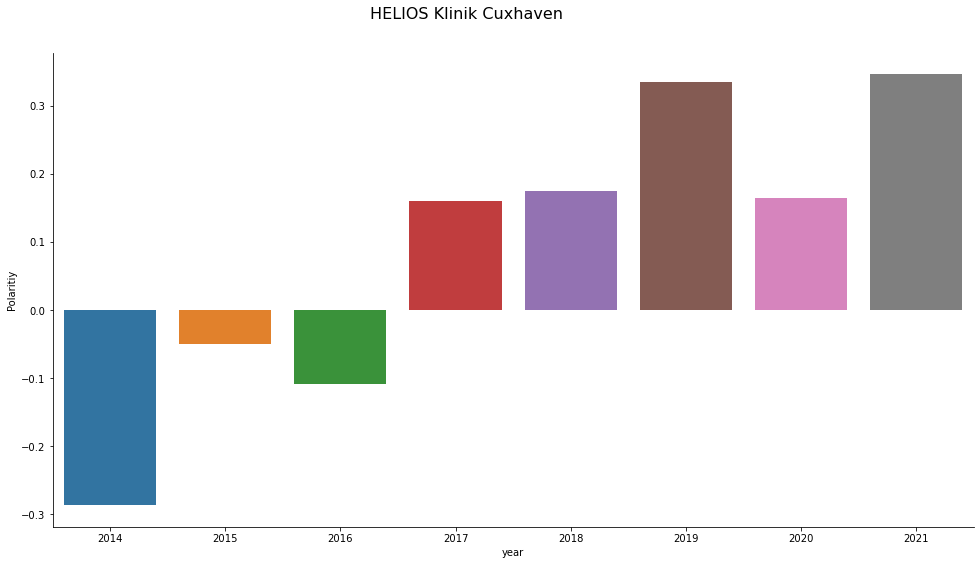

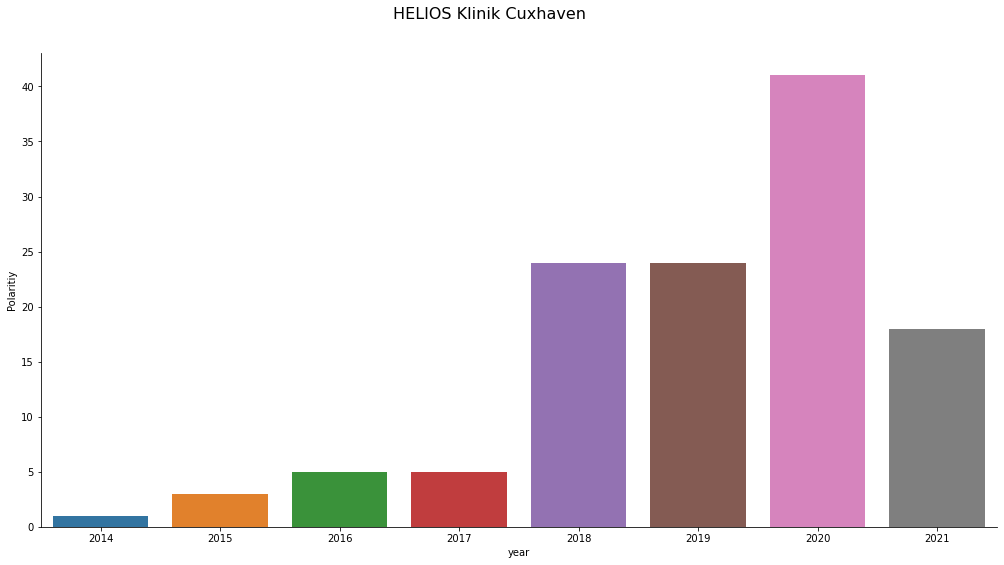

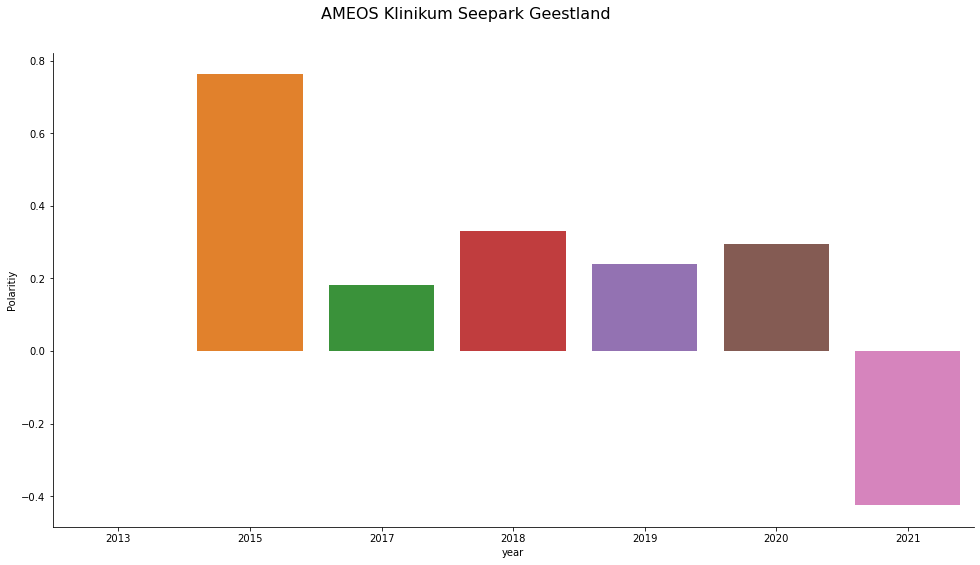

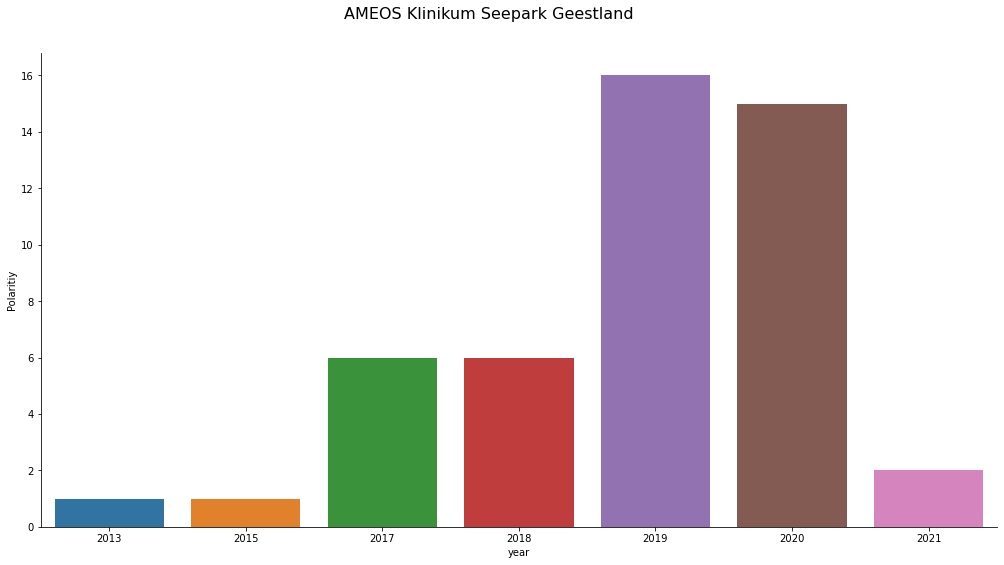

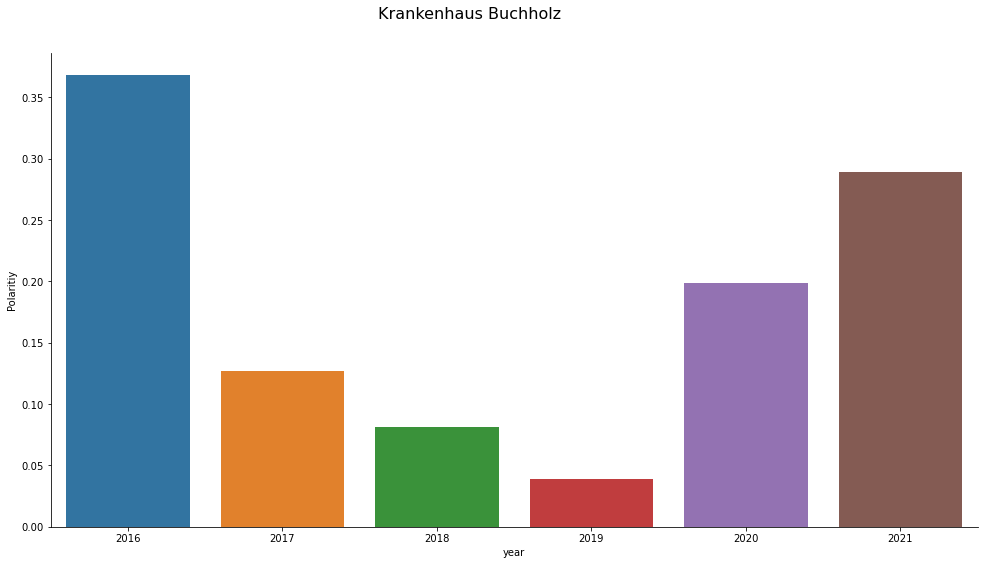

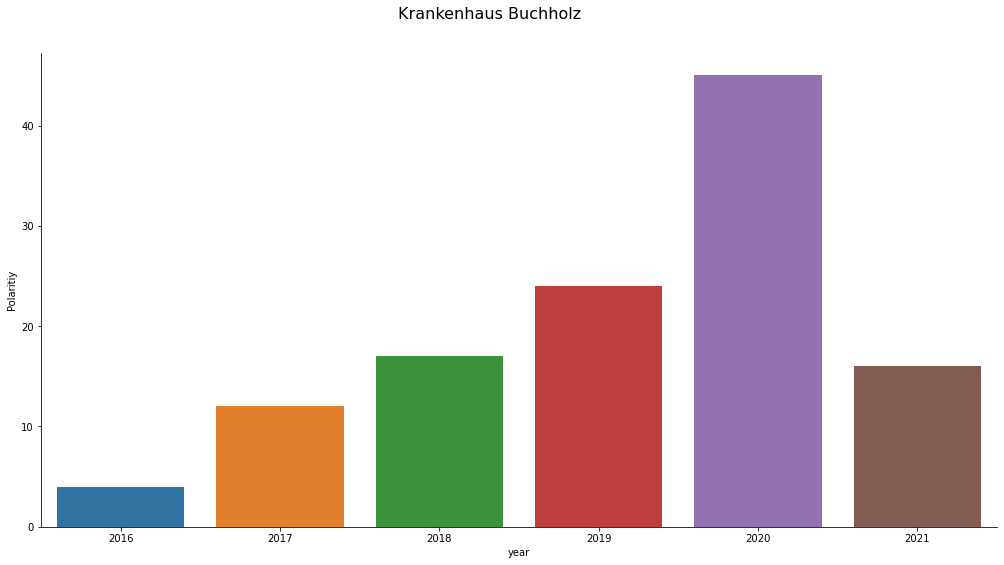

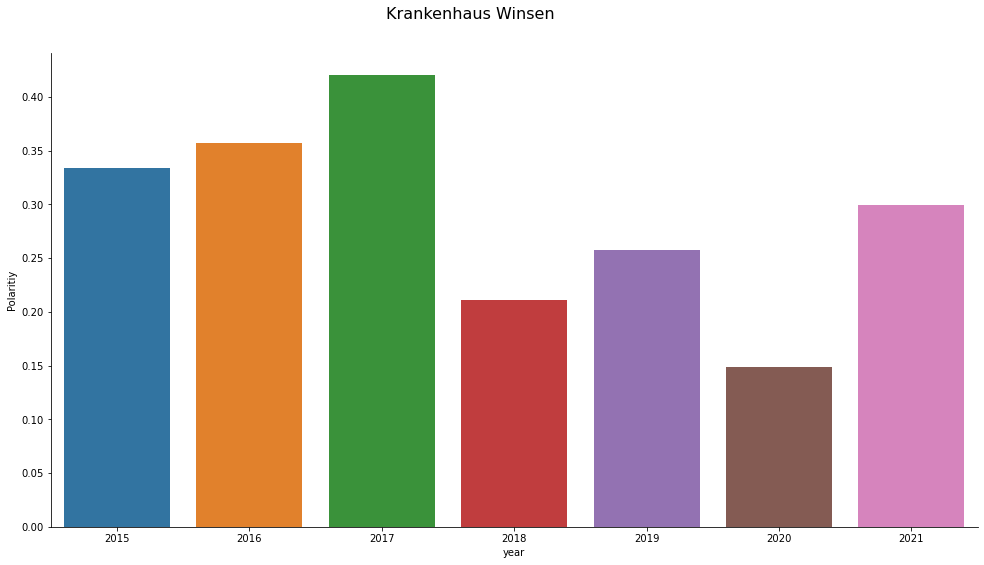

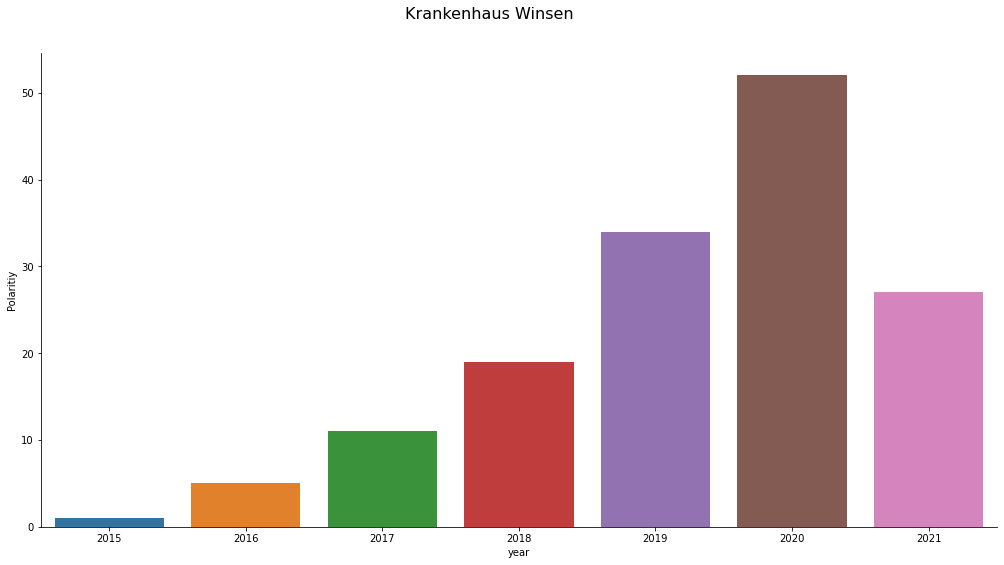

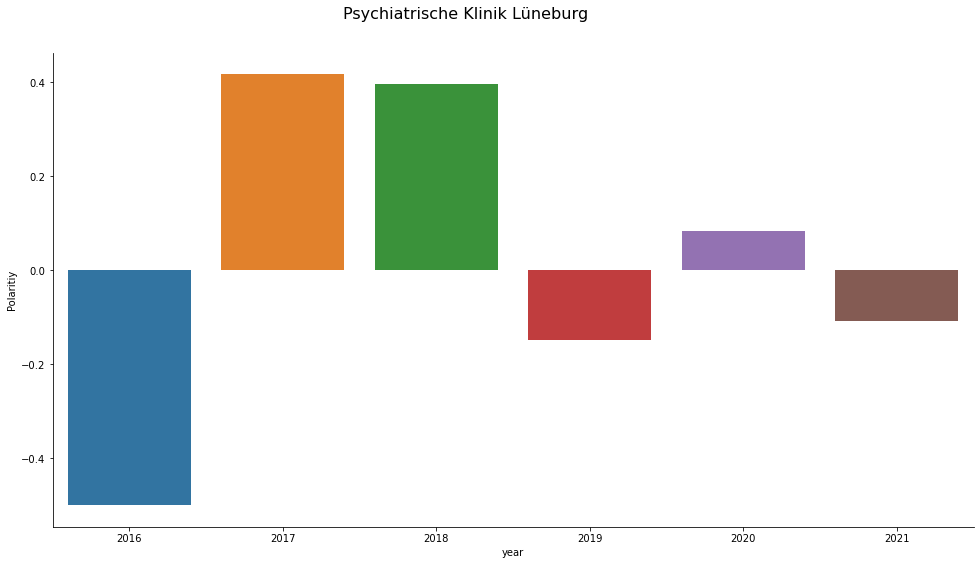

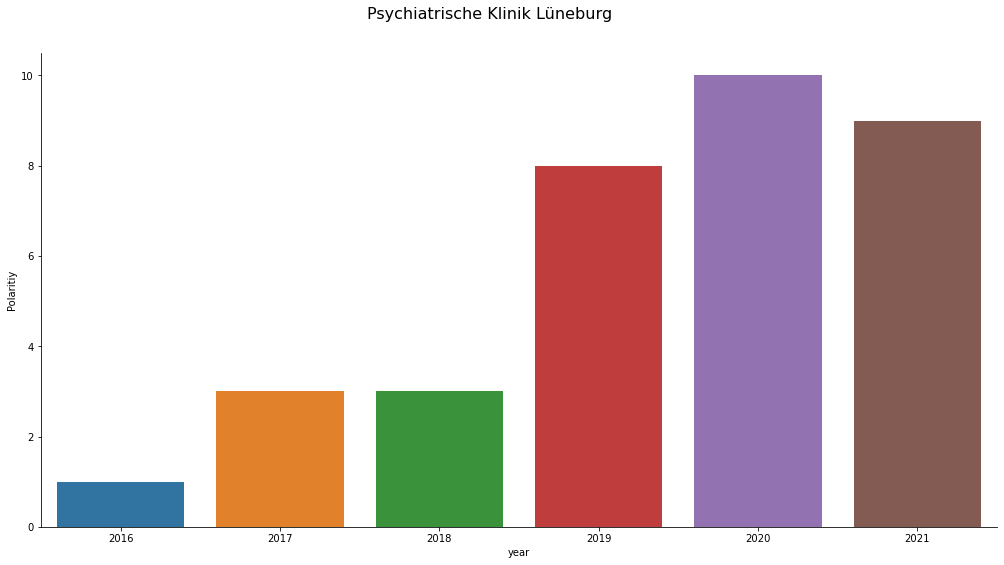

In [19]:
for klinik in df["Name der Klinik"].unique():
    
    g=sns.catplot(x="year",y="Polaritiy",data=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).mean(),kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="Images_google/KlinikByKlinik/PolaritiyProJahr/PolaritiyProJahr_"+klinik+"_google.png"
    #g.fig.savefig(name)

    g=sns.catplot(x="year",y="Polaritiy",data=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count(),kind="bar")
    g.fig.set_size_inches(15,8)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(klinik, fontsize=16)
    name="Images_google/KlinikByKlinik/KommentareProJahr/KommentareProJahr_"+klinik+"_google.png"
    #g.fig.savefig(name)



[0, 1, 0, 2, 5, 14, 13, 32]
[1, 1, 0, 1, 2, 5, 7, 11]


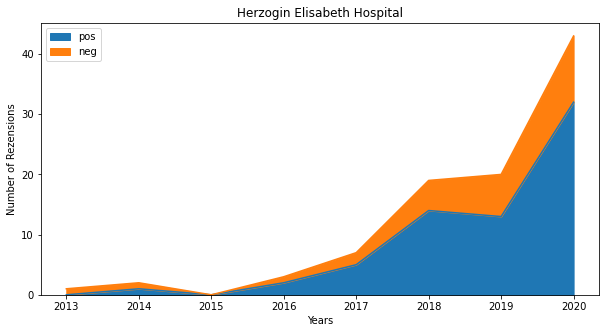

[1, 3, 2, 4, 8]
[0, 1, 3, 3, 3]


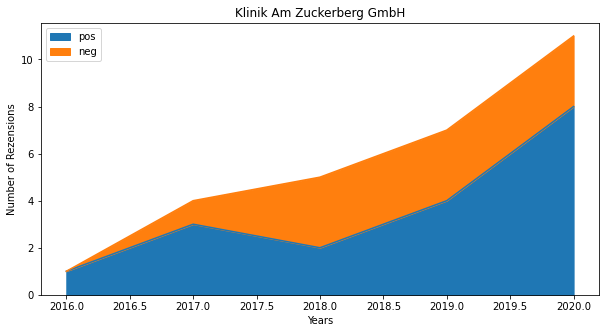

[2, 3, 0, 3, 5, 16, 23]
[1, 0, 3, 7, 12, 25, 45]


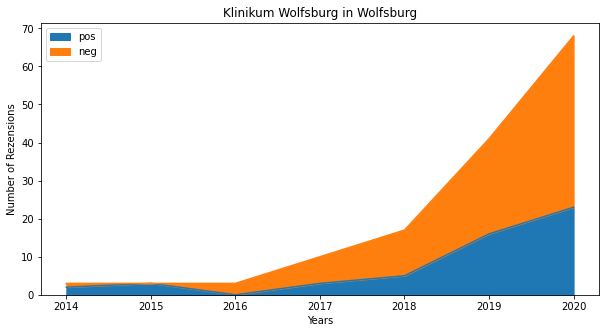

[1, 2, 7, 8, 15]
[4, 4, 12, 18, 20]


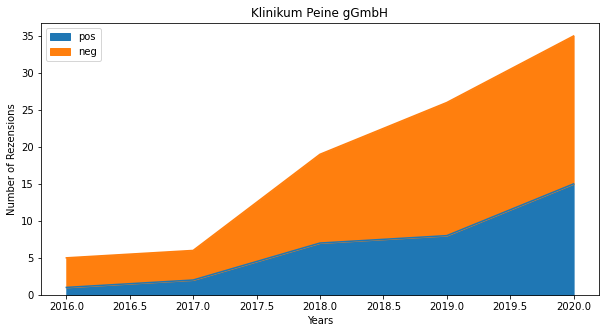

[1, 1, 7, 9]
[0, 1, 4, 2]


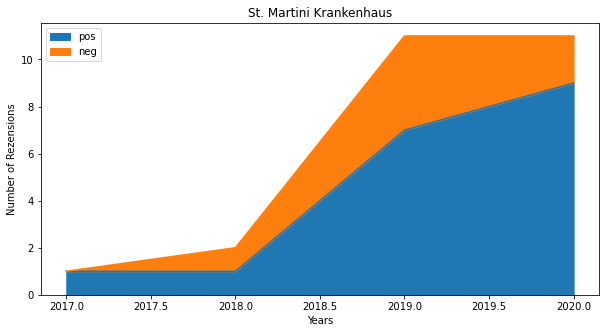

[1, 1, 0, 5, 4, 7, 23]
[0, 0, 2, 8, 3, 11, 18]


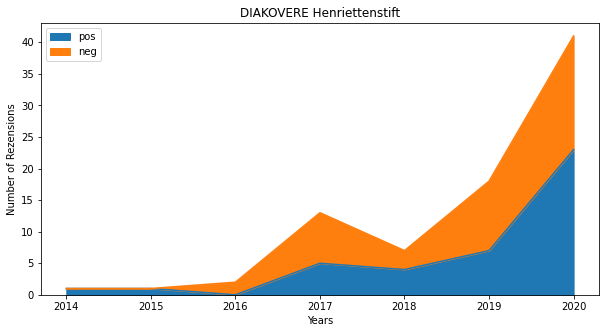

[1, 0, 2, 8, 9]
[0, 0, 0, 2, 2]


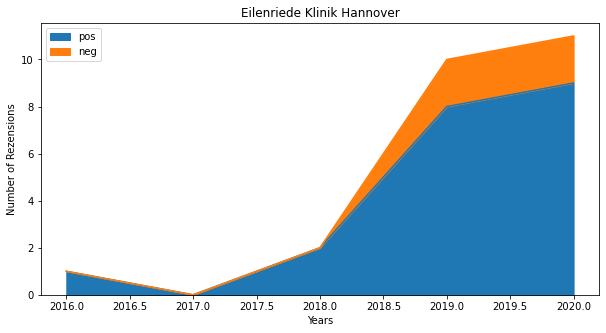

[0, 0, 1, 0, 3, 6, 13, 20]
[1, 1, 0, 2, 2, 5, 8, 16]


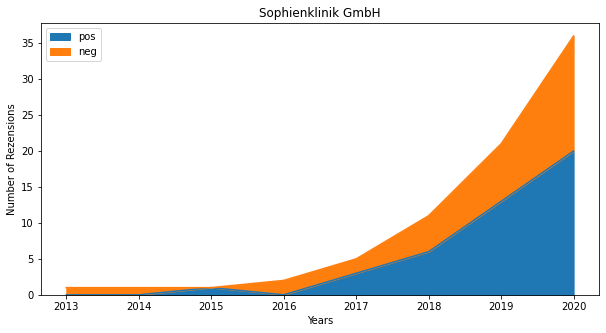

[1, 4, 4, 9, 12]
[4, 4, 12, 21, 23]


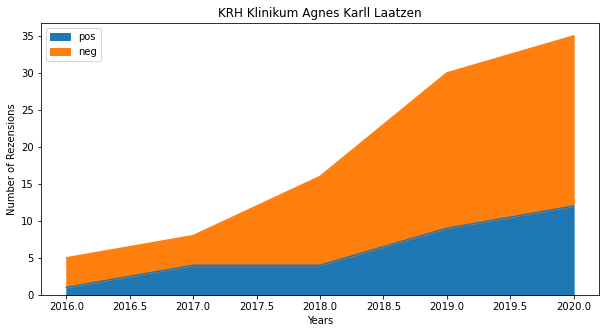

[0, 0, 3, 4]
[1, 1, 5, 4]


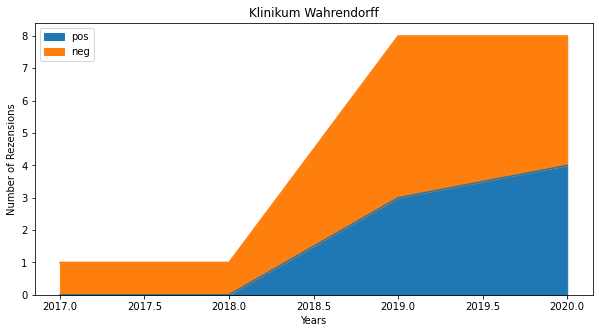

[2, 0, 1, 0, 1, 5, 2, 8]
[0, 0, 1, 2, 2, 3, 4, 23]


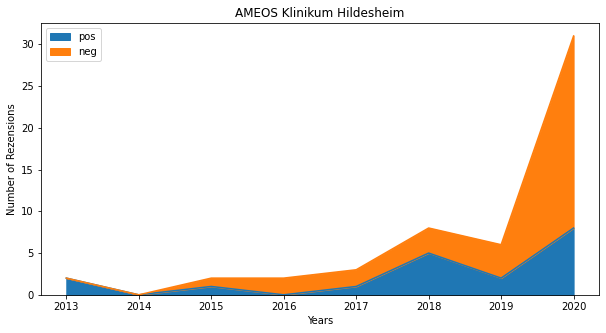

[0, 6, 5, 8, 11]
[4, 16, 13, 21, 41]


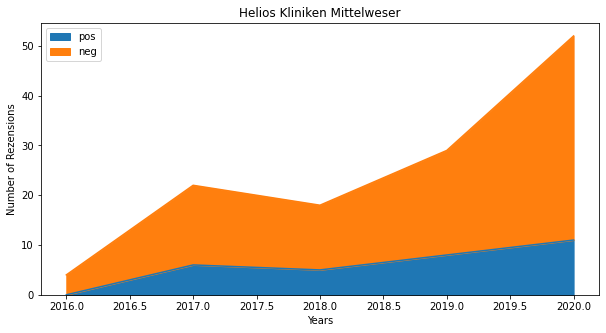

[0, 1, 1, 1, 8, 12, 14]
[1, 2, 4, 4, 16, 12, 27]


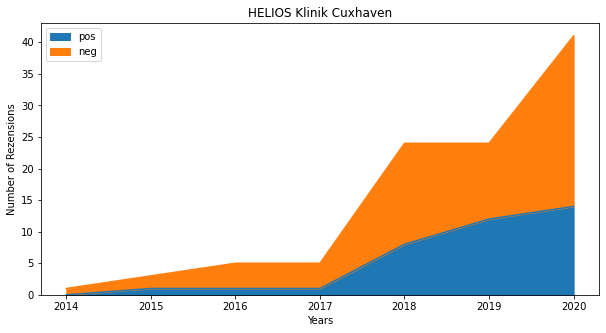

[0, 0, 1, 0, 3, 3, 7, 7]
[1, 0, 0, 0, 3, 3, 9, 8]


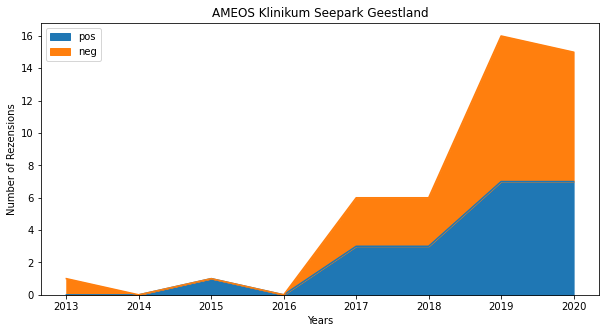

[2, 4, 8, 7, 18]
[2, 8, 9, 17, 27]


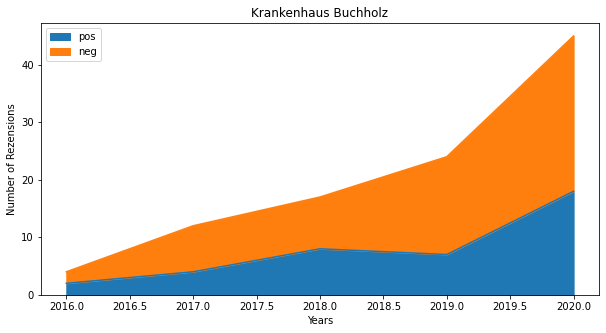

[1, 2, 9, 8, 15, 20]
[0, 3, 2, 11, 19, 32]


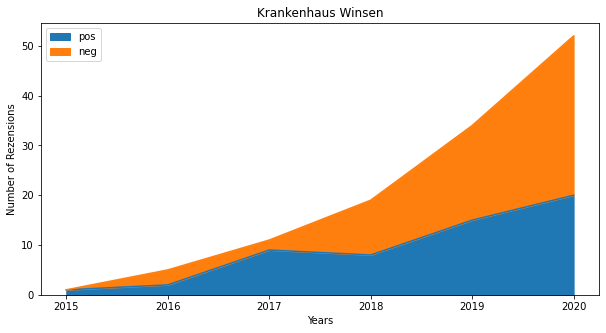

[0, 2, 2, 2, 2]
[1, 1, 1, 6, 8]


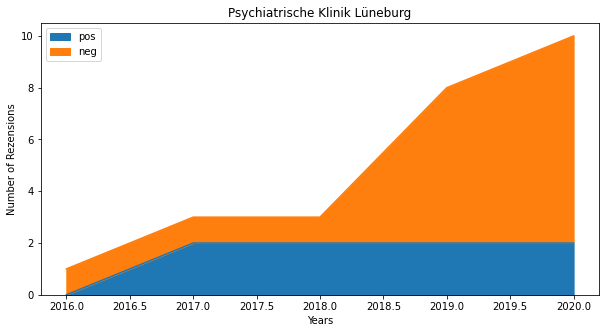

In [20]:
for klinik in df["Name der Klinik"].unique():
    first=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'][0]
    end=df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'][len(df[df["Name der Klinik"]==klinik].groupby(['year'],as_index=False).count()['year'])-1]
    pos,neg=[],[]
    for i in range(first,end):
        pos.append(len(df[(df["Name der Klinik"]==klinik) & (df["positive"]==1) & (df["year"]==i)]))
        neg.append(len(df[(df["Name der Klinik"]==klinik) & (df["positive"]==0)& (df["year"]==i)]))

    print(pos)
    print(neg)
    years = [i for i in range(first,end)]
    len(years)
    d = {'pos': pos, 'neg':neg}
    temp_df = pd.DataFrame(data=d)
    temp_df.index=years

    temp_df.index = temp_df.index.map(int)
    temp_df.plot(kind='area', 
                 stacked=True,

                 figsize=(10, 5), # pass a tuple (x, y) size
                 )

    plt.title(klinik)
    plt.ylabel('Number of Rezensions')
    plt.xlabel('Years')
    
    name="Images_google/KlinikByKlinik/PositiveNegativeProJahr/PositiveNegativeProJahr_"+klinik+"_google.png"
    #plt.savefig(name)

    plt.show()

End...

In [16]:
df

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1
2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1
3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1
4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0
...,...,...,...,...,...,...,...,...
1482,Psychiatrische Klinik Lüneburg,Ratiopharms Rache... leicht anmaßende Azubis u...,1,1.000000,0.0,2017,1,1
1483,Psychiatrische Klinik Lüneburg,Es war schlimm,1,-1.000000,0.0,2019,0,0
1484,Psychiatrische Klinik Lüneburg,Menschenunwürdig,1,-1.000000,0.0,2019,0,0
1485,Psychiatrische Klinik Lüneburg,Nicht gute Mitarbeiter,3,-0.500000,0.0,2016,0,0


In [40]:
yearlyRez=df[["year","Name der Klinik"]].groupby(['year'],as_index=False).count()
yearlyRez

,year,Name der Klinik
0,2013,5
1,2014,8
2,2015,12
3,2016,43
4,2017,117
5,2018,194
6,2019,333
7,2020,545
8,2021,230


In [36]:
yearlyRez_pos=df[["year","Name der Klinik"]][df["positive"]==1].groupby(['year'],as_index=False).count()
yearlyRez_posa

,year,Name der Klinik
0,2013,2
1,2014,4
2,2015,9
3,2016,11
4,2017,52
5,2018,84
6,2019,141
7,2020,235
8,2021,106


In [32]:
yearlyRez_neg=df[["year","Name der Klinik"]][df["positive"]==0].groupby(['year'],as_index=False).count()
yearlyRez_neg

,year,Name der Klinik
0,2013,3
1,2014,4
2,2015,3
3,2016,32
4,2017,65
5,2018,110
6,2019,192
7,2020,310
8,2021,124


In [37]:
yearlyRez_pos["negative"]=yearlyRez_neg["Name der Klinik"]

In [38]:
yearlyRez_pos

,year,Name der Klinik,negative
0,2013,2,3
1,2014,4,4
2,2015,9,3
3,2016,11,32
4,2017,52,65
5,2018,84,110
6,2019,141,192
7,2020,235,310
8,2021,106,124


In [39]:
yearlyRez_pos.columns = yearlyRez_pos.columns.str.replace('Name der Klinik', 'positive')
yearlyRez_pos

,year,positive,negative
0,2013,2,3
1,2014,4,4
2,2015,9,3
3,2016,11,32
4,2017,52,65
5,2018,84,110
6,2019,141,192
7,2020,235,310
8,2021,106,124


In [42]:
yearlyRez_pos.to_json(r'yearly_posNeg.json', orient='records')